## modification for handling missing values, some EDA, heatmaps and converting categorical features by label encode and dummy variables

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the data
df = pd.read_csv('train.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# reading data description
with open('data_description.txt', 'r') as file:
    print(file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

Feom data description we notice some columns that have NA, but NA here indicates something not missing value. In Alley column, NA means "No alley access". In BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtFinSF1 columns, NA means "No Basement". In FireplaceQu column, NA means "No fireplace". In GarageType, GarageCond, GarageFinish columns, NA means "No Garage". In PoolQC column, NA means No Pool. In Fence column, NA means No fence. In MiscFeature column, NA means None. So we will replace all NAs to make pandas read them as not missing values.

In [5]:
df.Alley = df.Alley.fillna(value = 'NoAlley')
df.BsmtCond = df.BsmtCond.fillna(value = 'NoBsmt')
df.BsmtQual = df.BsmtQual.fillna(value = 'NoBsmt')
df.BsmtExposure = df.BsmtExposure.fillna(value= 'NoBsmt')
df.BsmtFinType1 = df.BsmtFinType1.fillna(value= 'NoBsmt')
df.BsmtFinType2 = df.BsmtFinType2.fillna(value= 'NoBsmt')
df.FireplaceQu = df.FireplaceQu.fillna(value = 'Nofireplace')
df.GarageType = df.GarageType.fillna(value = 'NoGarage')
df.GarageCond = df.GarageCond.fillna(value = 'NoGarage')
df.GarageFinish = df.GarageFinish.fillna(value = 'NoGarage')
df.GarageQual = df.GarageQual.fillna(value = 'NoGarage')
df.PoolQC = df.PoolQC.fillna(value = 'NoPool')
df.Fence = df.Fence.fillna(value = 'NoFence')
df.MiscFeature = df.MiscFeature.fillna(value = 'NoMisc')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

In [7]:
df.isnull().sum().sort_values(ascending=False)

LotFrontage     259
GarageYrBlt      81
MasVnrType        8
MasVnrArea        8
Electrical        1
               ... 
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu       0
MSSubClass        0
Length: 80, dtype: int64

In [8]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

LotFrontage column has 259 missing values. We cannot drop them because we will lose information so we will fill them by the mean, but since we seek more accuracy, we will fill each missing by the mean of its category of Lot configuration. For GarageYrBlt, missing values are because there are no garage so we will fill them by buillding year of the house, then to make it more meaningful we subtract this column by YearBuilt column. In MasVnrType and MasVnArea, missing values are the same so probably they are none as most common. For electrical, it is only one missing value so we will drop it.

In [9]:
df.LotFrontage.fillna(df.groupby('LotConfig')['LotFrontage'].transform('mean'), inplace=True)
df.GarageYrBlt = df.GarageYrBlt.fillna(df.YearBuilt)
df.GarageYrBlt = df.GarageYrBlt - df.YearBuilt
df.MasVnrType = df.MasVnrType.fillna(value = 'None')
df.MasVnrArea = df.MasVnrArea.fillna(value = 0)

In [10]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 no

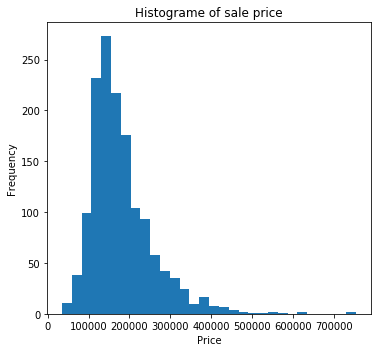

In [11]:
#checking the distribution of sale price (target)
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(df.SalePrice, bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histograme of sale price')
plt.tight_layout()

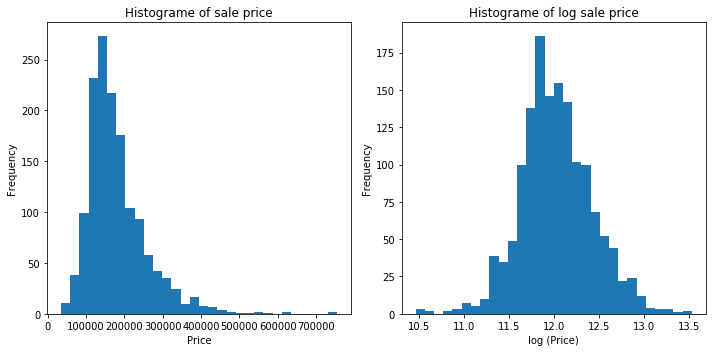

In [12]:
# it is not normal distribution so we will check the log
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(df.SalePrice, bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histograme of sale price')
plt.subplot(122)
plt.hist(np.log(df.SalePrice), bins=30)
plt.xlabel('log (Price)')
plt.ylabel('Frequency')
plt.title('Histograme of log sale price')
plt.tight_layout()

log price looks normal and there are no outliers so it is ready.

#### EDA for numerical and categorical features

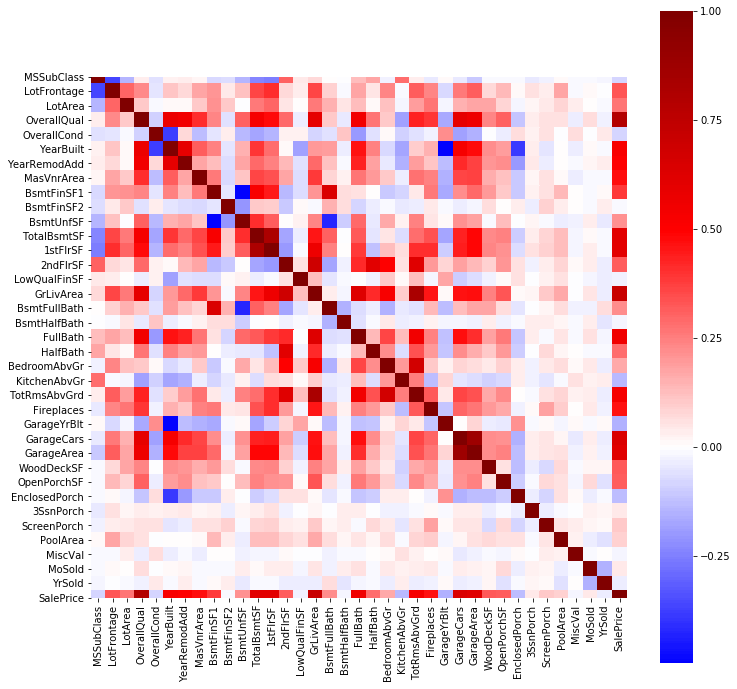

In [13]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, ax=ax, cmap='seismic', center= 0.0, square = True);

From the above figure, there are some features which have high corrolation with the sale price column and most of them are positive corrolation.

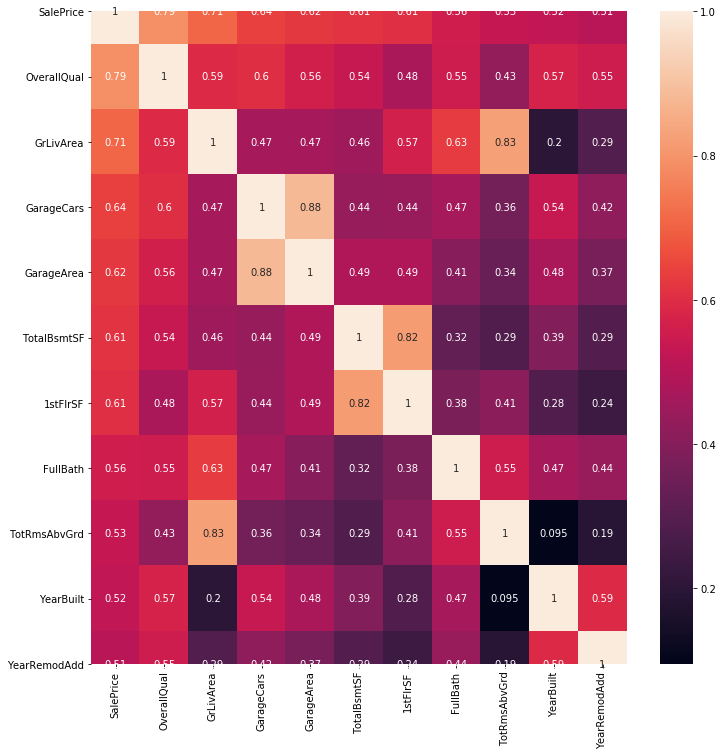

In [14]:
# the top 10 features correlated with sale price
corr = df.corr()
cols = corr.nlargest(11, 'SalePrice')['SalePrice'].index 
corr = df[cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, ax=ax, xticklabels=cols, yticklabels=cols, annot=True);

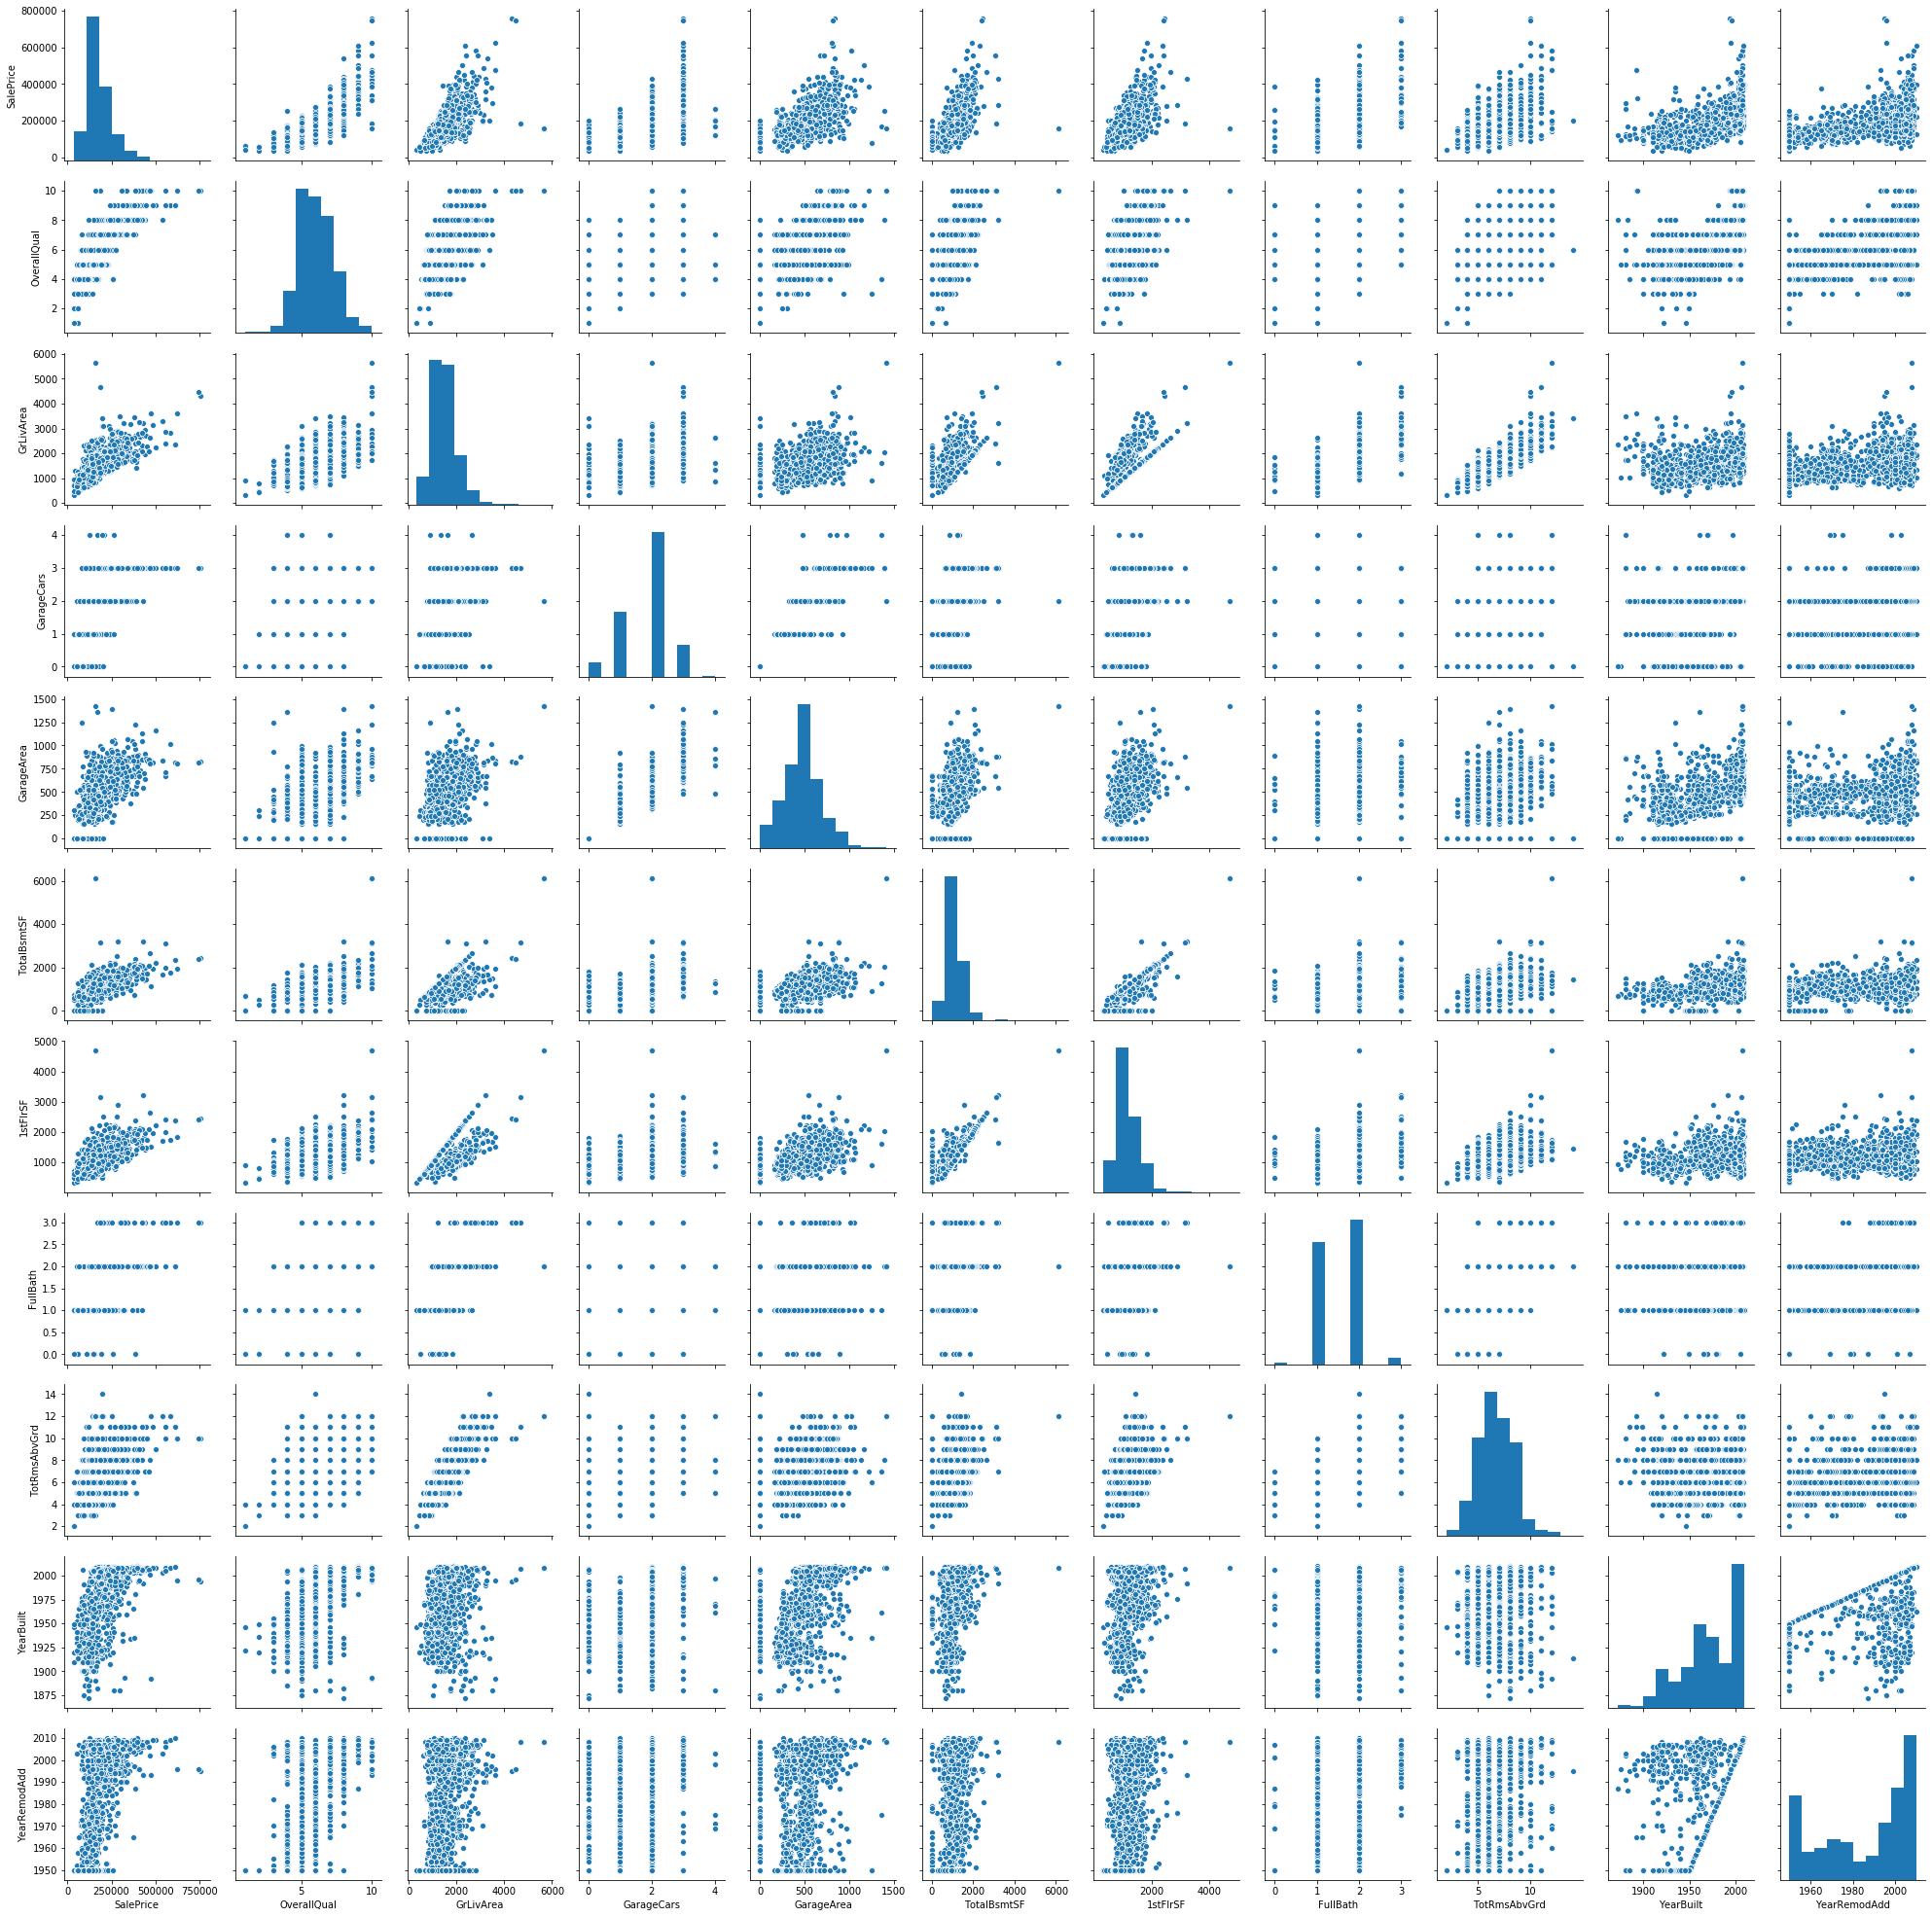

In [15]:
sns.pairplot(df[cols]);

Numerical columns with high corrolation with Sale price are ’OverallQual’, ’GrLivArea’, ’GarageCars’, ’GarageArea’,’TotalBsmtSF’, ’1stFlrSF’, ’FullBath’, ’TotRmsAbv-Grd’ and ’YearBuilt’ 

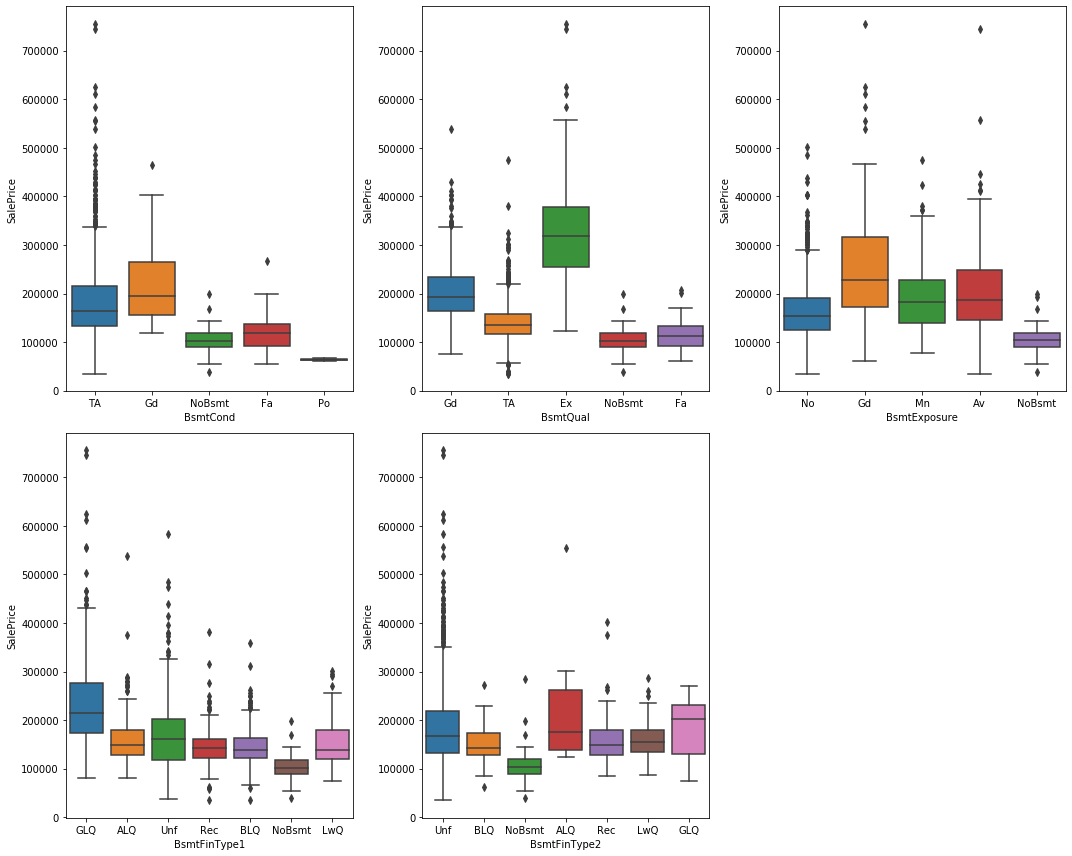

In [16]:
#Columns related to Basement
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(231)
f1 = sns.catplot(x="BsmtCond", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f1.fig)
ax = fig.add_subplot(232)
f2 = sns.catplot(x="BsmtQual", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f2.fig)
ax = fig.add_subplot(233)
f3 = sns.catplot(x="BsmtExposure", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f3.fig)
ax = fig.add_subplot(234)
f4 = sns.catplot(x="BsmtFinType1", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f4.fig)
ax = fig.add_subplot(235)
f5 = sns.catplot(x="BsmtFinType2", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f5.fig)
plt.tight_layout()

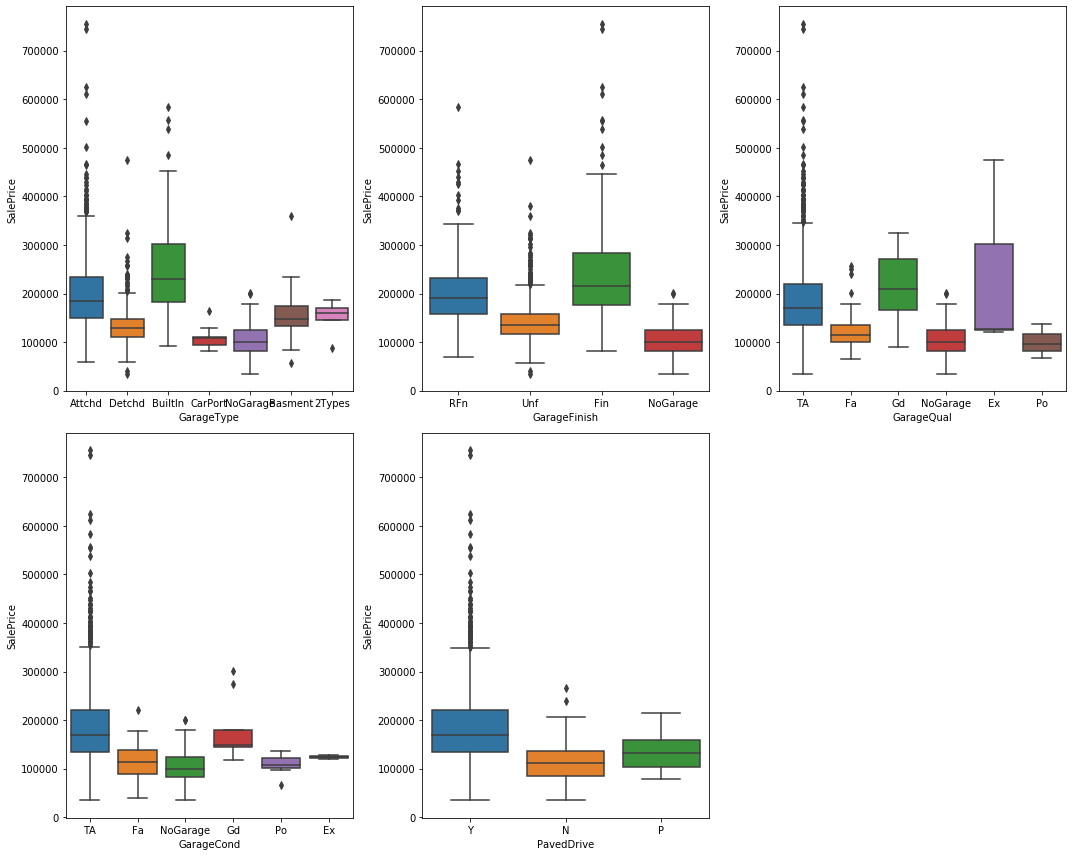

In [17]:
# Columns related to Garage
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(231)
f1 = sns.catplot(x="GarageType", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f1.fig)
ax = fig.add_subplot(232)
f2 = sns.catplot(x="GarageFinish", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f2.fig)
ax = fig.add_subplot(233)
f3 = sns.catplot(x="GarageQual", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f3.fig)
ax = fig.add_subplot(234)
f4 = sns.catplot(x="GarageCond", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f4.fig)
ax = fig.add_subplot(235)
f5 = sns.catplot(x="PavedDrive", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f5.fig)

plt.tight_layout()

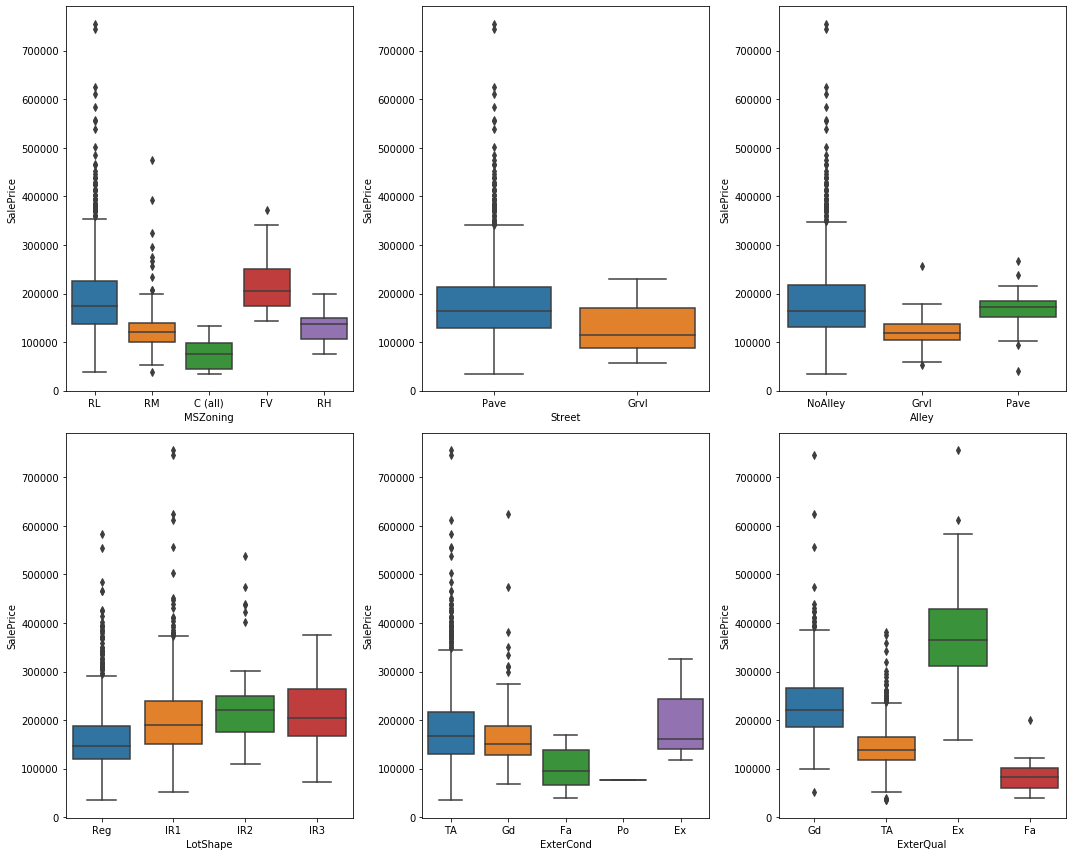

In [18]:
# Columns related to surrounding condition 
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(231)
f1 = sns.catplot(x="MSZoning", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f1.fig)
ax = fig.add_subplot(232)
f2 = sns.catplot(x="Street", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f2.fig)
ax = fig.add_subplot(233)
f3 = sns.catplot(x="Alley", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f3.fig)
ax = fig.add_subplot(234)
f4 = sns.catplot(x="LotShape", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f4.fig)
ax = fig.add_subplot(235)
f5 = sns.catplot(x="ExterCond", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f5.fig)
ax = fig.add_subplot(236)
f6 = sns.catplot(x="ExterQual", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f6.fig)
plt.tight_layout()

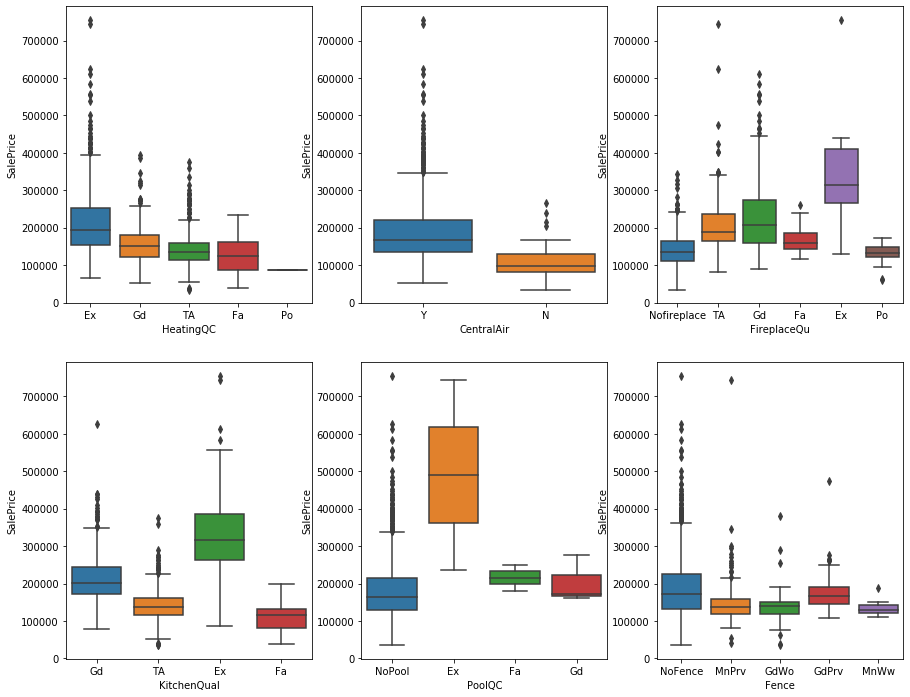

In [19]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(231)
f1 = sns.catplot(x="HeatingQC", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f1.fig)
ax = fig.add_subplot(232)
f2 = sns.catplot(x="CentralAir", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f2.fig)
ax = fig.add_subplot(233)
f3 = sns.catplot(x="FireplaceQu", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f3.fig)
ax = fig.add_subplot(234)
f4 = sns.catplot(x="KitchenQual", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f4.fig)
ax = fig.add_subplot(235)
f5 = sns.catplot(x="PoolQC", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f5.fig)
ax = fig.add_subplot(236)
f6 = sns.catplot(x="Fence", y="SalePrice", kind="box", data=df, ax=ax)
plt.close(f6.fig)

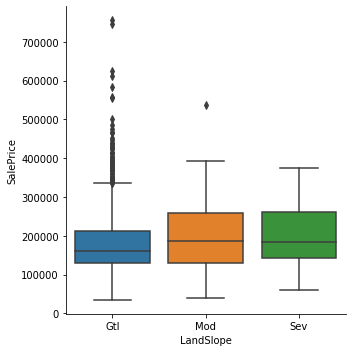

In [11]:
sns.catplot(x="LandSlope", y="SalePrice", kind="box", data=df)

In [12]:
df.BsmtCond = df.BsmtCond.map({'Ex':5 ,'Gd':4 , 'TA':3 ,'Fa':2 ,'Po':1 , 'NoBsmt':0})
df.BsmtQual = df.BsmtQual.map({'Ex':5 ,'Gd':4 , 'TA':3 ,'Fa':2 ,'Po':1 , 'NoBsmt':0})
df.BsmtExposure = df.BsmtExposure.map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NoBsmt':0})
df.BsmtFinType1 = df.BsmtFinType1.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NoBsmt':0})
df.BsmtFinType2 = df.BsmtFinType2.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NoBsmt':0})

df.GarageType = df.GarageType.map({'BuiltIn':6, 'Attchd': 5, '2Types':4 , 'Basment':3 , 'Detchd':2, 'CarPort' :1 , 'NoGarage': 0})
df.GarageCond = df.GarageCond.map({'NoGarage':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.GarageQual = df.GarageQual.map({'NoGarage':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.GarageFinish = df.GarageFinish.map({'Fin':3, 'RFn':2, 'Unf':1, 'NoGarage':0})
df.PavedDrive = df.PavedDrive.map({'Y':3,'P':2, 'N':1 })

df.MSZoning = df.MSZoning.map({'FV':1,'C (all)':2,"RL":3,'RM':4,'RH':5})
df.Street = df.Street.map({'Pave':2,'Grvl':1})
df.Alley = df.Alley.map({'NoAlley':0,'Grvl':1, 'Pave':2})
df.LotShape = df.LotShape.map({'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1})
df.ExterCond = df.ExterCond.map({"Ex":5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df.ExterQual = df.ExterQual.map({"Ex":5,'Gd':4,'TA':3,'Fa':2,'Po':1})

df.CentralAir = df.CentralAir.map({'Y':1, 'N':0})
df.HeatingQC = df.HeatingQC.map({"Ex":5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df.FireplaceQu = df.FireplaceQu.map({"Ex":5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'Nofireplace':0})
df.KitchenQual = df.KitchenQual.map({"Ex":5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df.PoolQC = df.PoolQC.map({"Ex":4,'Gd':3,'TA':2,'Fa':1,'NoPool':0})
df.Fence = df.Fence.map({'GdPrv':4 , 'MnPrv':3 , 'GdWo':2 , 'MnWw':1 , 'NoFence':0})

df.LandSlope = df.LandSlope.map({'Sev':3,'Mod':2, 'Gtl':1 })
df.Functional = df.Functional.map({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1})
df.SaleCondition = df.SaleCondition.map({'Normal':6,'Abnorml':5,'AdjLand':4,'Alloca':3,'Family':2,'Partial':1})


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null int64
Alley            1459 non-null int64
LotShape         1459 non-null int64
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null int64
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-nul

In [14]:
numerical_df = pd.get_dummies(df, drop_first= True)

In [16]:
numerical_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,2,0,4,1,7,5,...,0,0,0,0,0,0,0,0,0,1
2,20,3,80.0,9600,2,0,4,1,6,8,...,0,0,0,0,0,0,0,0,0,1
3,60,3,68.0,11250,2,0,3,1,7,5,...,0,0,0,0,0,0,0,0,0,1
4,70,3,60.0,9550,2,0,3,1,7,5,...,0,0,0,0,0,0,0,0,0,1
5,60,3,84.0,14260,2,0,3,1,8,5,...,0,0,0,0,0,0,0,0,0,1


In [15]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1460
Columns: 190 entries, MSSubClass to SaleType_WD
dtypes: float64(3), int64(59), uint8(128)
memory usage: 940.5 KB


In [17]:
numerical_df.to_csv('Numerical_data.csv')